In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("Breast Cancer Wisconsin (Diagnostic) Data Set.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.drop(labels=["Unnamed: 32","id"],axis=1,inplace=True) # these columns have nothing to do with the final prediction.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df['Diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0) #1 for malignant and 0 for benign.

In [10]:
df.drop(labels="diagnosis",axis=1,inplace=True)

In [11]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


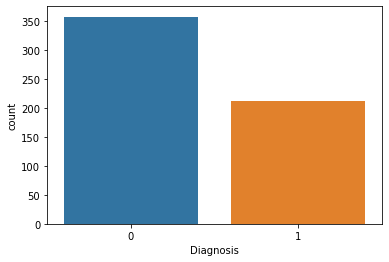

In [12]:
sns.countplot(x='Diagnosis',data=df)

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [15]:
df.isnull().sum() #good news....the dataset is perfect !

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Diagnosis                  0
dtype: int64

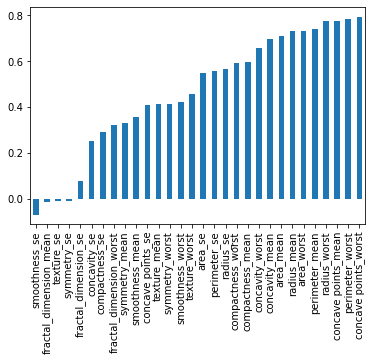

In [17]:
df.corr()['Diagnosis'][:-1].sort_values().plot(kind='bar')

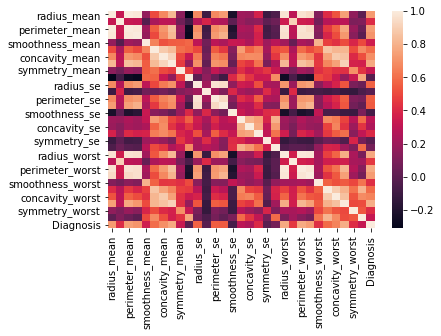

In [18]:
sns.heatmap(df.corr())

#now from the corelation graphs we see the that the dependency of the final predictions is quite good on very column
#so better not to drop anything...

In [20]:
#now splitting the test-train data and scaling down the features...
#scaling features is necessary because the range of some columns is 0-1 and for others its >100.

In [21]:
X = df.drop('Diagnosis',axis=1).values
y = df['Diagnosis'].values

In [29]:
from sklearn.metrics import classification_report

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(X_train)

MinMaxScaler()

In [25]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [28]:
prediction1 = model1.predict(X_test)

In [31]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       105
           1       0.98      0.86      0.92        66

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
model2 = KNeighborsClassifier(n_neighbors=7)

In [63]:
model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [64]:
prediction2 = model2.predict(X_test)

In [65]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       105
           1       0.98      0.94      0.96        66

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## SVM

In [51]:
from sklearn.svm import SVC

In [54]:
model3 = SVC()

In [55]:
model3.fit(X_train,y_train)

SVC()

In [56]:
prediction3 = model3.predict(X_test)

In [57]:
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       105
           1       0.98      0.94      0.96        66

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## Keras Sequential Model

In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout

In [91]:
X_train.shape

(398, 30)

In [106]:
model4 = Sequential()
model4.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model4.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model4.add(Dense(units=1,activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam')# binary classification problem so binary_crossentropy loss estimator

In [107]:
from tensorflow.keras.callbacks import EarlyStopping

In [108]:
ring = EarlyStopping(monitor='val_loss', mode='min',patience=20)

In [109]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test, y_test), verbose=1,callbacks=[ring])

Epoch 1/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0257 - val_loss: 0.1278
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0260 - val_loss: 0.1335
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0239 - val_loss: 0.1269
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0259 - val_loss: 0.1241
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0239 - val_loss: 0.1336
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.1287
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0244 - val_loss: 0.1280
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.1294
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.1290
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0240 - val_loss: 0.1275
Epoch 11/

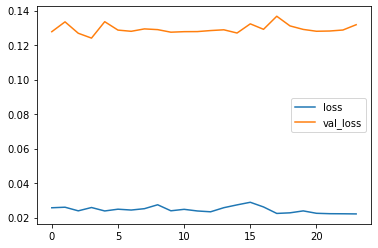

In [110]:
loss = pd.DataFrame(model.history.history)
loss.plot()
#we see that after about 50 epoch validation loss is constant so we are not overfitting to train data !

In [111]:
prediction4 = model4.predict_classes(X_test)

C:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [112]:
print(classification_report(y_test,prediction4))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       105
           1       0.00      0.00      0.00        66

    accuracy                           0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN = SVM > LOG_Reg > Sigmoid_ANN